<a href="https://colab.research.google.com/github/kevinpolisano/chess/blob/main/convert_lichess_to_anki_flashcard_with_pgn_extract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convert lichess study to Anki chess 2.0 flashcards with pgn-extract

## Prerequisites 

Install the following tools:
- `curl` to transfer data from URLs
- `unzip` to decompress archives
- `make` to compile codes

In [2]:
!apt update
!apt install -y curl unzip make

Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Get:6 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:7 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:10 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1,343 kB]
Get:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease [24.3 kB]
Get:12 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,158 kB]
Hit:13 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InReleas

Download and decompress the archive containing `pgn-extract` 

In [3]:
!curl -LOC - https://www.cs.kent.ac.uk/~djb/pgn-extract/pgn-extract-22-11.zip && unzip pgn-extract-*.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   260  100   260    0     0    497      0 --:--:-- --:--:-- --:--:--   496
100  583k  100  583k    0     0   537k      0  0:00:01  0:00:01 --:--:--  537k
Archive:  pgn-extract-22-11.zip
   creating: pgn-extract/
  inflating: pgn-extract/zobrist.c   
  inflating: pgn-extract/lines.h     
  inflating: pgn-extract/defs.h      
  inflating: pgn-extract/help.html   
  inflating: pgn-extract/end.h       
  inflating: pgn-extract/index.html  
  inflating: pgn-extract/argsfile.h  
   creating: pgn-extract/test/
  inflating: pgn-extract/test/Makefile  
  inflating: pgn-extract/test/runtests  
   creating: pgn-extract/test/outfiles/
  inflating: pgn-extract/test/outfiles/test-z-out.pgn  
  inflating: pgn-extract/test/outfiles/test-WWepd-out.pgn  
  inflating: pgn-extract/test/outfiles/test-o-out.pgn  
  inflating: pgn-extract/test/outfi

Compile the project to generate the binary executable `pgn-extract`

In [4]:
!cd pgn-extract && make

gcc -c -pedantic -Wall -Wshadow -Wformat -Wpointer-arith -Wstrict-prototypes -Wmissing-prototypes -Wwrite-strings -Wsign-compare -Wimplicit-function-declaration -g -I/usr/local/lib/ansi-include -std=c99  -O3 grammar.c
gcc -c -pedantic -Wall -Wshadow -Wformat -Wpointer-arith -Wstrict-prototypes -Wmissing-prototypes -Wwrite-strings -Wsign-compare -Wimplicit-function-declaration -g -I/usr/local/lib/ansi-include -std=c99  -O3 lex.c
gcc -c -pedantic -Wall -Wshadow -Wformat -Wpointer-arith -Wstrict-prototypes -Wmissing-prototypes -Wwrite-strings -Wsign-compare -Wimplicit-function-declaration -g -I/usr/local/lib/ansi-include -std=c99  -O3 map.c
gcc -c -pedantic -Wall -Wshadow -Wformat -Wpointer-arith -Wstrict-prototypes -Wmissing-prototypes -Wwrite-strings -Wsign-compare -Wimplicit-function-declaration -g -I/usr/local/lib/ansi-include -std=c99  -O3 decode.c
gcc -c -pedantic -Wall -Wshadow -Wformat -Wpointer-arith -Wstrict-prototypes -Wmissing-prototypes -Wwrite-strings -Wsign-compare -Wimplic

## Create a lichess study and export the PGN files

In this notebook I'm dealing with the example of the defense against the *fried liver attack* proposed in this (french) YouTube video:

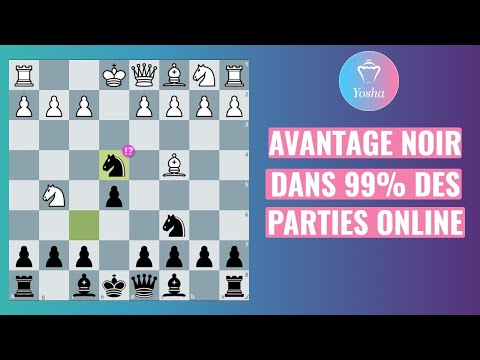

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo("OwJU0H39II4", width=400)

I have created a lichess study from the analysis in this video:

In [6]:
from IPython.display import IFrame
IFrame('https://lichess.org/study/embed/dCLE24Th/13j95kBZ', width=700, height=350)

The study is divided into several chapters corresponding to the different possible reactions of whites to the trap `4.. Nxe4`:

1. `5. Nxe4`: The white knight captures the black knight which seems "free". But it follows a `d4` fork, recovering a piece.
2. `5. Nxf7`: White's knight ignores the move and performs the plan originally purposed by forking queen-rook. The threat is then reversed by bringing the queen back on the attack with `Qh4`.
3. `5. Bxf7+`: the bishop captures a pawn on check, forcing the king to escape with `Ke7`
4. `6. d4`: White's rebuttal in the last scenario `5. Bxf7+`

First export the PGN files corresponding to each chapter and rename them respectively as follows:
- `Nex4`
- `Nxf7`
- `Bxf7+`
- `d4` 



## Modify the PGN files with pgn-extract

Upload these 4 files in Google Colab.

Then, for each file, apply the argument `--dropply` of [pgn-extract](https://www.cs.kent.ac.uk/people/staff/djb/pgn-extract/help.html#dropply) to remove the useless first moves for the studied position:

In [8]:
!cd pgn-extract && \
./pgn-extract --dropply 8 ../Nxe4.pgn > ../Nxe4_dropped.pgn && \
./pgn-extract --dropply 8 ../Nxf7.pgn > ../Nxf7_dropped.pgn && \
./pgn-extract --dropply 8 ../Bxf7+.pgn > ../Bxf7+_dropped.pgn && \
./pgn-extract --dropply 9 ../d4.pgn > ../d4_dropped.pgn

Processing ../Nxe4.pgn
Fried Liver Attack (Defense Nxe4): Nxe4 https://lichess.org/study/dCLE24Th/1YEJtAyc 
1 game matched out of 1.
Processing ../Nxf7.pgn
Fried Liver Attack (Defense Nxe4): Nxf7 https://lichess.org/study/dCLE24Th/13j95kBZ 
1 game matched out of 1.
Processing ../Bxf7+.pgn
Fried Liver Attack (Defense Nxe4): Bxf7+ https://lichess.org/study/dCLE24Th/hJ36Q8EL 
1 game matched out of 1.
Processing ../d4.pgn
Fried Liver Attack (Defense Nxe4): d4 https://lichess.org/study/dCLE24Th/5S8u5IHJ 
1 game matched out of 1.


A tag `[FEN "..."]` is added to the PGN files.

Then create a folder for each chapter:

In [9]:
!mkdir Nxe4 Nxf7 Bxf7+ d4

[Split the files](https://www.cs.kent.ac.uk/people/staff/djb/pgn-extract/help.html#splitvariants) into different parts corresponding to each variant with the argument `--splitvariants`:

In [19]:
!cd pgn-extract && \
./pgn-extract --splitvariants --output ../Nxe4/Nxe4_splitted.pgn ../Nxe4_dropped.pgn && \
./pgn-extract --splitvariants --output ../Nxf7/Nxf7_splitted.pgn ../Nxf7_dropped.pgn && \
./pgn-extract --splitvariants --output ../Bxf7+/Bxf7+_splitted.pgn ../Bxf7+_dropped.pgn && \
./pgn-extract --splitvariants --output ../d4/d4_splitted.pgn ../d4_dropped.pgn

Processing ../Nxe4_dropped.pgn
? - ? Fried Liver Attack (Defense Nxe4): Nxe4 https://lichess.org/study/dCLE24Th/1YEJtAyc ????.??.?? 
1 game matched out of 1.
Processing ../Nxf7_dropped.pgn
? - ? Fried Liver Attack (Defense Nxe4): Nxf7 https://lichess.org/study/dCLE24Th/13j95kBZ ????.??.?? 
1 game matched out of 1.
Processing ../Bxf7+_dropped.pgn
? - ? Fried Liver Attack (Defense Nxe4): Bxf7+ https://lichess.org/study/dCLE24Th/hJ36Q8EL ????.??.?? 
1 game matched out of 1.
Processing ../d4_dropped.pgn
? - ? Fried Liver Attack (Defense Nxe4): d4 https://lichess.org/study/dCLE24Th/5S8u5IHJ ????.??.?? 
1 game matched out of 1.


Create [separate output files](https://www.cs.kent.ac.uk/people/staff/djb/pgn-extract/help.html#separate-output) for each corresponding variant with the flag `-#` and then remove the files ending by `_splitted.pgn`:
:

In [20]:
!cd Nxe4 && ../pgn-extract/pgn-extract Nxe4_splitted.pgn -#1 && rm Nxe4_splitted.pgn && \
cd ../Nxf7 && ../pgn-extract/pgn-extract Nxf7_splitted.pgn -#1 && rm Nxf7_splitted.pgn && \
cd ../Bxf7+ && ../pgn-extract/pgn-extract Bxf7+_splitted.pgn -#1 && rm Bxf7+_splitted.pgn && \
cd ../d4 && ../pgn-extract/pgn-extract d4_splitted.pgn -#1 && rm d4_splitted.pgn

Processing Nxe4_splitted.pgn
? - ? Fried Liver Attack (Defense Nxe4): Nxe4 https://lichess.org/study/dCLE24Th/1YEJtAyc ????.??.?? 
1 game matched out of 1.
Processing Nxf7_splitted.pgn
? - ? Fried Liver Attack (Defense Nxe4): Nxf7 https://lichess.org/study/dCLE24Th/13j95kBZ ????.??.?? 
? - ? Fried Liver Attack (Defense Nxe4): Nxf7 https://lichess.org/study/dCLE24Th/13j95kBZ ????.??.?? 
? - ? Fried Liver Attack (Defense Nxe4): Nxf7 https://lichess.org/study/dCLE24Th/13j95kBZ ????.??.?? 
? - ? Fried Liver Attack (Defense Nxe4): Nxf7 https://lichess.org/study/dCLE24Th/13j95kBZ ????.??.?? 
? - ? Fried Liver Attack (Defense Nxe4): Nxf7 https://lichess.org/study/dCLE24Th/13j95kBZ ????.??.?? 
? - ? Fried Liver Attack (Defense Nxe4): Nxf7 https://lichess.org/study/dCLE24Th/13j95kBZ ????.??.?? 
? - ? Fried Liver Attack (Defense Nxe4): Nxf7 https://lichess.org/study/dCLE24Th/13j95kBZ ????.??.?? 
7 games matched out of 7.
Processing Bxf7+_splitted.pgn
? - ? Fried Liver Attack (Defense Nxe4): Bxf7

## Use these PGN files to create flashcards

Compress the different folders:

In [12]:
!zip -r Nxe4.zip Nxe4/ && \
zip -r Nxf7.zip Nxf7/ && \
zip -r Bxf7+.zip Bxf7+/ && \
zip -r d4.zip d4/

  adding: Nxe4/ (stored 0%)
  adding: Nxe4/Nxe4_splitted.pgn (deflated 30%)
  adding: Nxe4/1.pgn (deflated 30%)
  adding: Nxf7/ (stored 0%)
  adding: Nxf7/7.pgn (deflated 30%)
  adding: Nxf7/2.pgn (deflated 30%)
  adding: Nxf7/3.pgn (deflated 30%)
  adding: Nxf7/6.pgn (deflated 30%)
  adding: Nxf7/1.pgn (deflated 29%)
  adding: Nxf7/Nxf7_splitted.pgn (deflated 86%)
  adding: Nxf7/5.pgn (deflated 31%)
  adding: Nxf7/4.pgn (deflated 30%)
  adding: Bxf7+/ (stored 0%)
  adding: Bxf7+/2.pgn (deflated 30%)
  adding: Bxf7+/3.pgn (deflated 31%)
  adding: Bxf7+/1.pgn (deflated 30%)
  adding: Bxf7+/4.pgn (deflated 30%)
  adding: Bxf7+/Bxf7+_splitted.pgn (deflated 77%)
  adding: d4/ (stored 0%)
  adding: d4/2.pgn (deflated 29%)
  adding: d4/3.pgn (deflated 29%)
  adding: d4/1.pgn (deflated 29%)
  adding: d4/5.pgn (deflated 29%)
  adding: d4/4.pgn (deflated 29%)
  adding: d4/d4_splitted.pgn (deflated 82%)


Download them on your computer and you are now able to create [Anki chess 2.0 flashcards](https://github.com/TowelSniffer/Anki-Chess-2.0) from these PGN files.

In [14]:
from google.colab import files
files.download("Nxe4.zip")
files.download("Nxf7.zip")
files.download("Bxf7+.zip")
files.download("d4.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>